Logistic Classification
=======================

$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{donde}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

**1.** Seleccionar cualquier Dataset de [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/).


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We define a few helpers.

In [2]:
def find(x): return np.nonzero(x)[0]

Two Classes Logistic Classification
-----------------------------------
La clasificación logística es, con [support vector machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine), el método de referencia para realizar la clasificación. Su principal ventaja sobre SVM es que es es un problema de minimización suave, y que también da salida a la clase
ofreciendo una interpretación probabilística de la clasificación.


Para comprender el comportamiento del método, generamos datos sintéticos distribuidos según una mezcla de Gaussianas con un solapamiento gobernado por un offset $\omega$.  Aquí los índices de las clases se fijan en $y_i \in
\{-1,1\}$ para simplificar las ecuaciones.

In [3]:
n = 1000 # numero de muestras
p = 2 # Dimension
omega = np.array([1,.5])*2.5 # offset
n1 = int(n/2)
X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))
print(X.shape)

(1000, 2)


Grafiquemos

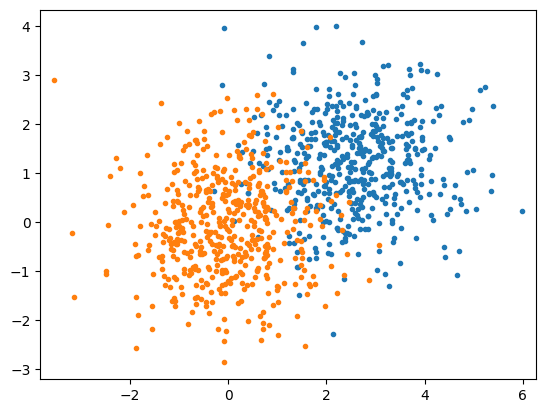

In [4]:
I = find(y==-1)
J = find(y==1)
plt.clf
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal');

La clasificación logística minimiza una pérdida logística en lugar de la habitual
$\ell^2$ loss para regression
  $$ \umin{w} E(w) \eqdef \frac{1}{n} \sum_{i=1}^n L(\dotp{x_i}{w},y_i)  $$
donde la regresion logistica es
  $$ L( s,y ) \eqdef \log( 1+\exp(-sy) ) $$
Esto corresponde a una minimización convexa suave. Si $X$ es inyectiva,
esto también es estrictamente convexa, por lo tanto, tiene un único mínimo global.


Comparemos la pérdida binaria (ideal) 0-1, la pérdida logística y la pérdida
<https://en.wikipedia.org/wiki/Hinge_loss hinge loss>
(utilizado para SVM).

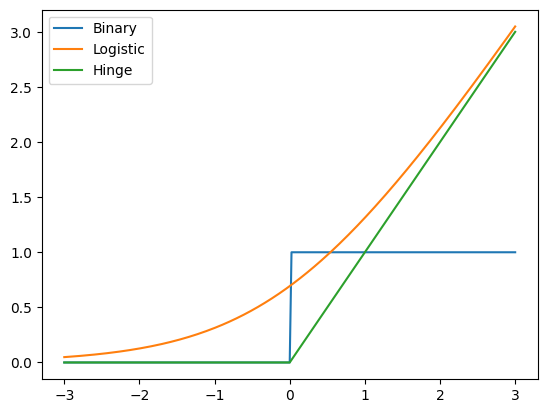

In [5]:
t = np.linspace(-3,3,255).transpose()
plt.clf
plt.plot(t, t>0)
plt.plot(t, np.log(1+np.exp(t)))
plt.plot(t, np.maximum(t,0) )
plt.axis('tight');
plt.legend(['Binary', 'Logistic', 'Hinge']);

Esto puede interpretarse como una <https://en.wikipedia.org/wiki/Maximum_likelihood_estimation maximum likelihood estimator> cuando se
modela la probabilidad de pertenecer a las dos clases para la muestra $x_i$ como

  $$ h(x_i) \eqdef (\th(x_i),1-\th(x_i)) $$
donde $$ \th(s) \eqdef \frac{e^{s}}{1+e^s} = (1+e^{-s})^{-1}  $$


Reescribiendo la energía para minimizar
  $$ E(w) = \Ll(X w,y) \qwhereq \Ll(s,y)= \frac{1}{n}  \sum_i L(s_i,y_i), $$
su gradiente se lee
$$ \nabla E(w) = X^\top \nabla \Ll(X w,y) $$
donde
$$ \nabla \Ll(s,y) = \frac{y}{n} \odot \th(-y \odot s)  $$
donde $\odot$ es el operador de multiplicación puntual,  y en Python es *.


Definir las energías.

In [6]:
def L(s,y):  return 1/n * sum( np.log( 1 + np.exp(-s*y) ) )
def E(w,X,y): return L(X.dot(w),y);

Definamos el gradiente

In [7]:
def theta(v): return 1 / (1+np.exp(-v))
def nablaL(s,r): return - 1/n * y * theta(-s * y)
def nablaE(w,X,y): return X.transpose().dot( nablaL(X.dot(w),y) )

_Importante:_ in para mejorar el rendimiento, es importante (especialmente en dimensiones bajas $p$) añadir un término de sesgo constante $w_{p+1} \in \RR$, y reemplaza $\dotp{x_i}{w}$
by $ \dotp{x_i}{w} + w_{p+1} $.  Esto se consigue de forma equivalente
añadiendo un $(p+1)^{\text{esimo}}$ igual a 1 a cada
$x_i$, lo que hacemos utilizando una macro comodo.

In [8]:
def AddBias(X): return np.hstack(( X, np.ones((np.size(X,0),1)) ))

Con este término de sesgo añadido, una vez $w_{\ell=0} \in \RR^{p+1}$ inicializado
(for instance at $0_{p+1}$),

In [9]:
w = np.zeros((p+1,1))
w

array([[0.],
       [0.],
       [0.]])

Realiza un paso de descenso de gradiente
$$ w_{\ell+1} = w_\ell - \tau_\ell \nabla E(w_\ell). $$

In [10]:
w = np.zeros((p+1,1))
tau = 1; # tau fijo
w = w - tau * nablaE(w,AddBias(X),y)

$$\tau < \frac{2}{L}$$
$$ L \leq \frac{1}{4}\norm{X}^2 $$
Si uno escoje
$$\tau < \tau_{\max} \eqdef \frac{2}{\frac{1}{4}\norm{X}^2},$$
entonces se asegura que el descenso del gradietne converga

In [11]:
np.linalg.norm(X)
tau_max = 2/(1/4 * np.linalg.norm(AddBias(X), 2)**2 )
print(tau_max)

0.0014593908598373492


__Exercise 1__

Implemente un gradiente descendente
$$ w_{\ell+1} = w_\ell - \tau_\ell \nabla E(w_\ell). $$
Monitorice la energia
Prueba diferentes tamaños de paso y compáralos con la teoría (en particular
traza en el dominio logarítmico para ilustrar la tasa lineal).


Text(0.5, 1.0, 'E(w)')

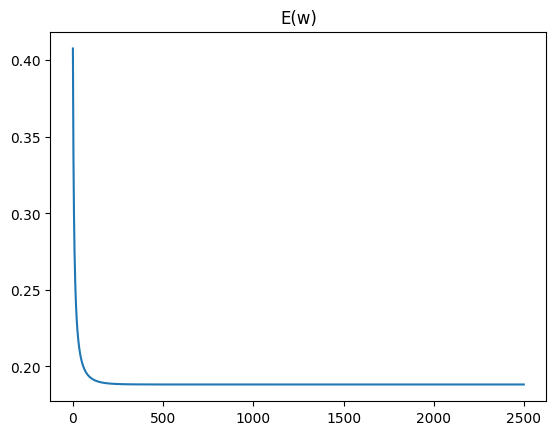

In [12]:
iter = 2500
energia = np.zeros(iter)
x = np.zeros(iter)

for i in range(iter):
  w = w - tau * nablaE(w,AddBias(X),y)
  energia[i] = E(w,AddBias(X),y)[0]
  x[i] = i

plt.figure(1)
plt.plot(x, energia)
plt.title('E(w)')

In [ ]:
print(w)

[[-2.67257666]
 [-1.31278453]
 [ 4.19764708]]


Generemo una grid 2D de puntos.

In [13]:
g = 201
tx = np.linspace( X[:,0].min(), X[:,0].max(),num=g)
ty = np.linspace( X[:,1].min(), X[:,1].max(),num=g)
[B,A] = np.meshgrid( ty,tx )
G = np.vstack([A.flatten(), B.flatten()]).transpose()

Evalúe la probabilidad de clase asociada a los vectores de peso en esta cuadrícula.

In [14]:
Theta = theta(AddBias(G).dot(w))
Theta = Theta.reshape((g,g))

Visualizar los datos superpuestos sobre la
probabilidad de clasificación, esto resalta el
hiperplano de separación $ \enscond{x}{\dotp{w}{x}=0} $.

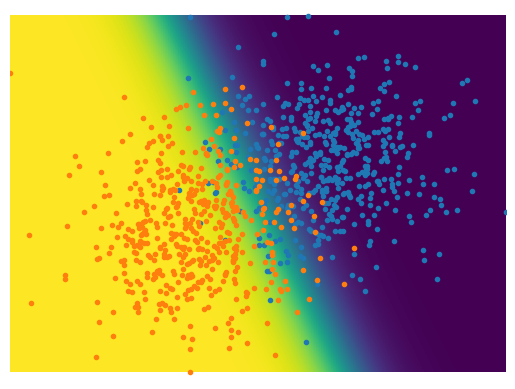

In [15]:
plt.clf
plt.imshow(Theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
plt.axis('equal')
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('off');

__Exercise 2__

Pruebe la influencia del offset de separación $\omega$ en el resultado.

In [16]:
def calcTheta(offset):
  n = 1000 # numero de muestras
  p = 2 # Dimension
  omega = np.array([1,.5])*2.5*offset # offset
  n1 = int(n/2)
  X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
  y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))

  w = np.zeros((p+1,1))
  tau = 1; # tau fijo
  w = w - tau * nablaE(w,AddBias(X),y)

  np.linalg.norm(X)

  for i in range(2500):
    w = w - tau * nablaE(w,AddBias(X),y)

  g = 401
  tx = np.linspace( X[:,0].min(), X[:,0].max(),num=g)
  ty = np.linspace( X[:,1].min(), X[:,1].max(),num=g)
  [B,A] = np.meshgrid(ty,tx)

  G = np.vstack([A.flatten(), B.flatten()]).transpose()
  Theta = theta(AddBias(G).dot(w))
  Theta = Theta.reshape((g,g))

  return X, y, Theta, tx, ty

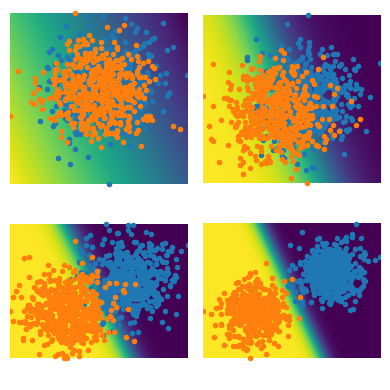

In [19]:
# Configuración de la figura
plt.figure(figsize=(4, 4))

X_, y_, Theta_, tx_, ty_ = calcTheta(0.1)

# Primera subgráfica
plt.subplot(2, 2, 1)
plt.imshow(Theta_.transpose(), origin="lower", extent=[tx_.min(), tx_.max(), ty_.min(), ty_.max()])
plt.plot(X_[I, 0], X_[I, 1], '.')
plt.plot(X_[J, 0], X_[J, 1], '.')
plt.axis('equal')
plt.axis('off')

X_, y_, Theta_, tx_, ty_ = calcTheta(0.5)

# Segunda subgráfica
plt.subplot(2, 2, 2)
plt.imshow(Theta_.transpose(), origin="lower", extent=[tx_.min(), tx_.max(), ty_.min(), ty_.max()])
plt.plot(X_[I, 0], X_[I, 1], '.')
plt.plot(X_[J, 0], X_[J, 1], '.')
plt.axis('equal')
plt.axis('off')

X_, y_, Theta_, tx_, ty_ = calcTheta(1.2)

# Tercera subgráfica
plt.subplot(2, 2, 3)
plt.imshow(Theta_.transpose(), origin="lower", extent=[tx_.min(), tx_.max(), ty_.min(), ty_.max()])
plt.plot(X_[I, 0], X_[I, 1], '.')
plt.plot(X_[J, 0], X_[J, 1], '.')
plt.axis('equal')
plt.axis('off')

X_, y_, Theta_, tx_, ty_ = calcTheta(2)

# Cuarta subgráfica
plt.subplot(2, 2, 4)
plt.imshow(Theta_.transpose(), origin="lower", extent=[tx_.min(), tx_.max(), ty_.min(), ty_.max()])
plt.plot(X_[I, 0], X_[I, 1], '.')
plt.plot(X_[J, 0], X_[J, 1], '.')
plt.axis('equal')
plt.axis('off')

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()


__Exercise 3__

Pruebe la clasificación logística en un conjunto de datos reales. [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/). Divida los datos en entrenamiento y prueba para evaluar el
para evaluar el rendimiento de la clasificación y comprobar el impacto de la regularización.

In [ ]:
import pandas as pd
import numpy as np

"""
Tomados de:
Tin Kam Ho and Eugene M. Kleinberg.
Building projectable classifiers of arbitrary complexity.
In Proceedings of the 13th International Conference on Pattern Recognition, pages 880–885, Vienna, Austria, August 1996.
"""

# Especifica la ruta del archivo de texto
archivo_txt = 'fourclass.txt'

# Lee el archivo de texto y carga los datos en un DataFrame
dataframe = pd.read_table(archivo_txt, sep='\s+|:', engine='python', header=None)

# Elimina la segunda y la cuarta columna del DataFrame
dataframe = dataframe.drop([1, 3], axis=1)
y = dataframe.iloc[:, 0].values.reshape(-1, 1)
X = dataframe.iloc[:, 1:].values

# Compute the mean and standard deviation of each column
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Apply Z-score normalization to each column
X = (X - mean) / std_dev

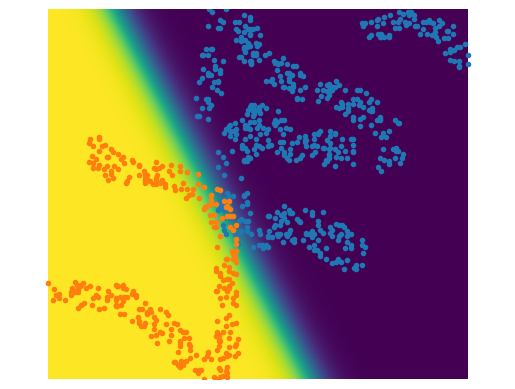

In [ ]:
n = y.shape[0] # numero de muestras
p = 2 # Dimension

omega = 3

#X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
# Separa la primera columna en un array y, y las otras dos columnas en un array X
y = dataframe.iloc[:, 0].values.reshape(-1, 1)
X = dataframe.iloc[:, 1:].values

# Compute the mean and standard deviation of each column
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Apply Z-score normalization to each column
X = (X - mean) / std_dev

I = find(y==-1)
J = find(y==1)

X[I,0] += 1*omega
X[I,1] += 0.5*omega

w = np.zeros((p+1,1))
tau = 1; # tau fijo
w = w - tau * nablaE(w,AddBias(X),y)

for i in range(2500):
  w = w - tau * nablaE(w,AddBias(X),y)

g = 201
tx = np.linspace( X[:,0].min(), X[:,0].max(),num=g)
ty = np.linspace( X[:,1].min(), X[:,1].max(),num=g)
[B,A] = np.meshgrid(ty,tx)

G = np.vstack([A.flatten(), B.flatten()]).transpose()
Theta = theta(AddBias(G).dot(w))
Theta = Theta.reshape((g,g))


plt.clf
plt.imshow(Theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
plt.axis('equal')
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('off')

Kernelized Logistic Classification
----------------------------------
La clasificación logística intenta separar las clases utilizando un hiperplano de separación lineal $ \enscond{x}{\dotp{w}{x}=0}. $


Para generar un límite de decisión no lineal, se puede sustituir el modelo
modelo lineal paramétrico por un modelo no lineal [no paramétrico].(https://en.wikipedia.org/wiki/Nonparametric_statistics) gracias a la
kernelización. Es no paramétrico en el sentido de que el número de
parámetro crece con el número $n$ de muestra (mientras que para el método básico
básico, el número de parámetros es $p$. Esto permite en particular
generar límites de decisión de complejidad arbitraria.


El inconveniente es que la complejidad numérica del método crece
(al menos) cuadráticamente con $n$.


Sin embargo, la buena noticia es que gracias a la teoría de
 [reproducción de espacios de Hilbert del núcleo](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space)
(RKHS), todavía se puede calcular esta función de decisión no lineal
utilizando (casi) el mismo algoritmo numérico.


Dado un kernel $ \kappa(x,z) \in \RR $ definido para $(x,z) \in \RR^p$,
el método kernelizado sustituye el funcional de decisión lineal $f(x) =
\dotp{x}{w}$ por una suma de kernel centrada en las muestras
$$ f_h(x) = \sum_{i=1}^p h_i k(x_i,x) $$
donde $h \in \RR^n$ es el vector desconocido de peso a encontrar


Al utilizar el núcleo lineal $\kappa(x,y)=\dotp{x}{y}$, se recupera
el método lineal estudiado anteriormente.


Macro para calcular la matriz de distancia euclidiana al cuadrado por pares.

In [ ]:
# Lento
def distmat1(X,Z):
    D = np.zeros((X.shape[0],Z.shape[0]))
    for i in np.arange(0,X.shape[0]):
        for j in np.arange(0,Z.shape[0]):
            D[i,j] = np.linalg.norm( X[i,:]-Z[j,:] );
    return D

In [ ]:
# Rapido
from scipy import spatial
def distmat(X,Z): return spatial.distance.cdist(X,Z)**2

El kernel gaussiano es el más conocido y utilizado
$$ \kappa(x,y) \eqdef e^{-\frac{\norm{x-y}^2}{2\sigma^2}}.  $$
El parámetro de ancho de banda $\si>0$ es crucial y controla la localidad de
del modelo. Suele ajustarse mediante validación cruzada.


In [ ]:
def kappa(X,Z,sigma): return np.exp( -distmat(X,Z)/(2*sigma**2) )

Generemos datos sintéticos en 2D que no son separables por un
hiperplano.

In [ ]:
n = 1000
p = 2;
t = 2*np.pi*np.random.randn(n1,1);
R = 2.5;
r = R*(1.5 + .2*np.random.randn(n1,1)); # radius
X1 = np.hstack((np.cos(t)*r, np.sin(t)*r));
X = np.vstack((np.random.randn(n1,2), X1))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))

Veamos las clases

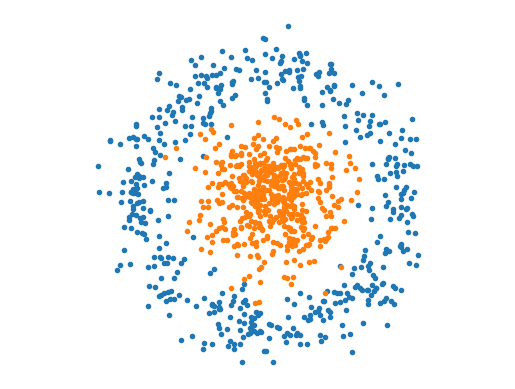

In [ ]:
I = find(y==-1)
J = find(y==1)
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal')
plt.axis('off');

Una vez evaluado en los puntos de la malla, el núcleo define una matriz
$$ K = (\kappa(x_i,x_j))_{i,j=1}^n \in \RR^{n \times n}.  $$

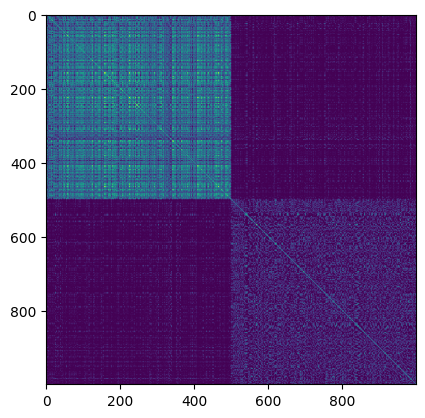

In [ ]:
sigma = 1;
K = kappa(X,X,sigma)
plt.imshow(K);

Los núcleos válidos son aquellos que dan lugar a matrices simétricas positivas
$K$. El núcleo lineal y el gaussiano son funciones de núcleo válidas. Otros
kernels populares incluyen el kernel polinómico $ \dotp{x}{y}^a $ para $a
\geq 1$ y el kernel laplaciano $ \exp( -\norm{x-y}^2/\si ) $.


La minimización Logística kernelizada es la siguiente
  $$ \umin{h} F(h) \eqdef \Ll(K h,y). $$

In [ ]:
def F(h,K,y): return L(K.dot(h),y)
def nablaF(h,K,y): return K.transpose().dot( nablaL(K.dot(h),y) )

Esta minimización puede relacionarse con un problema de optimización de dimensión infinita
donde se minimiza directamente sobre la función $f$. Este
se demuestra que es equivalente al problema de optimización finito-dimensional anterior
gracias a la teoría de RKHS.

__Exercise 4__

Implementar un descenso gradiente para minimizar $F(h)$.
Monitorizar la caída de energía.
Probar diferentes tamaños de paso, y comparar con la teoría.

In [ ]:
h = np.zeros((len(K),1))
iter = 1000
gamma = 0.7
E = np.zeros((len(K),1))
x = np.zeros((len(k),1))

for i in range(iter):
  gradiente = nablaF(h,K,y)
  h = h - gamma*gradiente

print(h)
print(gradiente.shape, h.shape)

TypeError: object of type 'int' has no len()

In [ ]:
## Inserta tu codigo.

Una vez encontrado este óptimo $h$, las probabilidades de clase en un punto
$x$ se obtienen como
  $$ (\th(f_h(x)), 1-\th(f_h(x)) $$
donde $f_h$ se ha definido anteriormente.


Evaluamos esta probabilidad de clasificación en una cuadrícula.

In [ ]:
q = 201
tmax = 5
t = np.linspace(-tmax,tmax,num=q)
[B,A] = np.meshgrid( t,t )
G = np.vstack([A.flatten(), B.flatten()]).transpose()
K1 = kappa(G,X,sigma)
Theta = theta( K1.dot(h) )
Theta = Theta.reshape((q,q))

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

Muestra la probabilidad de clasificación.

In [ ]:
plt.clf
plt.imshow(Theta.transpose(), origin="lower",  extent=[-tmax, tmax, -tmax, tmax])
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal')
plt.axis('off');

NameError: name 'tmax' is not defined

__Exercise 5__

Mostrar la evolución de la probabilidad de clasificación con $\sigma$

In [ ]:
## Inserta tu codigo.

__Exercise 6__

Separate the dataset into a training set and a testing set. Evaluate the classification performance
for varying $\si$. Try to introduce regularization and minmize
$$ \umin{h} F(h) \eqdef \Ll(K h,y) + \la R(h) $$
where for instance $R=\norm{\cdot}_2^2$ or  $R=\norm{\cdot}_1$.

In [ ]:
# Separar el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los valores de lambda para la regularización
lambdas = [0.01, 0.1, 1, 10, 100]

# Iterar sobre los valores de lambda
for l in lambdas:



Lambda: 0.01, Regularización L2 - Precisión: 0.9300
Lambda: 0.01, Regularización L1 - Precisión: 0.9300
Lambda: 0.1, Regularización L2 - Precisión: 0.9367
Lambda: 0.1, Regularización L1 - Precisión: 0.9300
Lambda: 1, Regularización L2 - Precisión: 0.9400
Lambda: 1, Regularización L1 - Precisión: 0.9367
Lambda: 10, Regularización L2 - Precisión: 0.9267
Lambda: 10, Regularización L1 - Precisión: 0.9367
Lambda: 100, Regularización L2 - Precisión: 0.8767
Lambda: 100, Regularización L1 - Precisión: 0.8000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Multi-Classes Logistic Classification
-------------------------------------
El método de clasificación logística se extiende a un número arbitrario
$k$ de clases considerando una familia de vectores de peso $ w_{\ell=1}^k$, que se almacenan convenientemente como columnas de la matriz $W \in \RR^{p \times k}$.


Esto permite modelizar probabilísticamente la pertenencia de un punto $x \in \RR^p $ a una
las clases utilizando un modelo exponencial
  $$ h(x) = \pa{ \frac{ e^{-\dotp{x}{w_\ell}} }{ \sum_m e^{-\dotp{x}{w_m}} } }_\ell $$
Este vector $h(x) \in [0,1]^k $ describe la probabilidad de $x$
pertenezca a las distintas clases, y $ \sum_\ell h(x)_\ell = 1 $.


El cálculo de $w$ se obtiene resolviendo un estimador de máxima verosimilitud
estimador
   $$ \umax{w \in \RR^k} \frac{1}{n} \sum_{i=1}^n \log( h(x_i)_{y_i} ) $$
donde recordamos que $y_i \in \{1,\ldots,k\}$ es el índice de clase de
punto $x_i$.


Esto es reescrito convenientemente como
  $$ \umin{w} \sum_i \text{LSE}( XW )_i - \dotp{XW}{D} $$
donde $D \in \{0,1\}^{n \times k}$ son las matrices binarias de índice de clase
  $$  D_{i,\ell} = \choice{
          1 \qifq y_i=\ell, \\
          0 \quad \text{otherwise}.
      }
   $$
y LSE es el operador log-sum-exp
  $$ \text{LSE}(S) = \log\pa{ \sum_\ell \exp(S_{i,\ell}) } \in \RR^n. $$

Recuerde que **max = - min**

https://people.tamu.edu/~sji/classes/LR.pdf

In [ ]:
def LSE0(S): return np.log( np.exp(S).sum(axis=1,keepdims=1))

El cálculo de LSE es inestable para gran valor de $S_{i,\ell}$ (desbordamiento numérico, produciendo NaN), pero esto puede ser
solucionado restando el elemento más grande de cada fila,
ya que $ \text{LSE}(S+a)=\text{LSE}(S)+a $ si $a$ es constante a lo largo de las filas. Esto es
el [célebre truco LSE](https://en.wikipedia.org/wiki/LogSumExp).

In [ ]:
def max2(S): return np.tile( S.max(axis=1,keepdims=1), (1,S.shape[1]) )
def LSE(S): return LSE0( S-max2(S) ) + S.max(axis=1,keepdims=1)

In [ ]:
# verifiquemos la igualdad entre LSE y LSE0
S = np.random.randn(4,5)
np.linalg.norm( LSE(S)-LSE0(S) )

NameError: name 'LSE' is not defined

El gradiente d el operador LSe es el
$\newcommand{\eqdef}{\equiv}$
<https://en.wikipedia.org/wiki/Softmax_function soft-max operator>
$$  \nabla \text{LSE}(S) = \text{SM}(S) \eqdef
      \pa{
          \frac{
                  e^{S_{i,\ell}}
              }{
                  \sum_m e^{S_{i,m}}
              } }   $$

In [ ]:
def SM0(S): return np.exp(S) / np.tile( np.exp(S).sum(axis=1,keepdims=1), (1, S.shape[1]) );

Similarmente a el LSE, este necesita ser estabilizado

In [ ]:
def SM(S): return SM0(S-max2(S))

In [ ]:
# Verifiquemos la igualdad de SM y SM0
np.linalg.norm( SM(S)-SM0(S) )

NameError: name 'SM' is not defined

Cargamos un conjunto de datos de $n$ imágenes de tamaño $p = 8 \times 8$, que representan dígitos de 0
a 9 (por lo que hay $k=10$ clases).


Cargamos el conjunto de datos y lo permutamos aleatoriamente.
Separar las características $X$ de los datos $y$ para predecir la información.

In [ ]:
from sklearn.datasets import load_digits
from scipy import io
import numpy as np

# Cargar los datos
digits = load_digits()
X = digits.images #(1797, 8, 8)
y = digits.target #(10)

# Generar un índice de permutación aleatorio
index = np.random.permutation(len(X))

# Aplicar la permutación a ambas matrices X e y
X = X[index]
y = y[index]

# Transformar la matriz a forma (1797, 64)
X = X.reshape(1797, -1)

$n$ es el número de muestras, $p$ es la dimensionalidad de las características, $k$
el número de clases.

In [ ]:
[n,p] = X.shape
p1 = int(np.sqrt(p))
CL = np.unique(y)  # lista de clases.
k = np.size(CL)

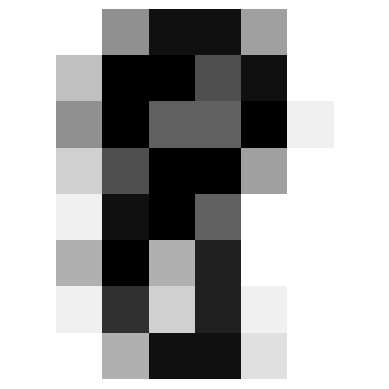

In [ ]:
f = X[1,:]
f = np.reshape( f,(p1,p1) )
plt.imshow(f.max()-f, cmap="gray")
plt.axis('off');

Visualizemos algunos dígitos de muestra

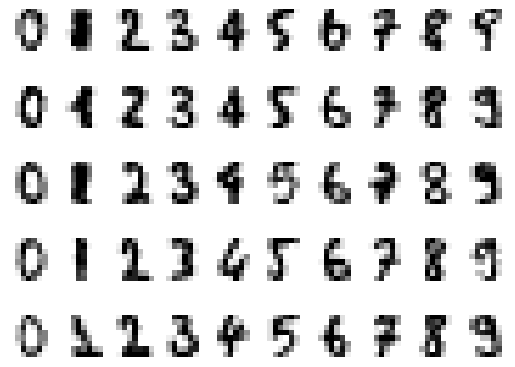

In [ ]:
q = 5
plt.clf
for i in np.arange(0,k):
    I = find(y==CL[i])
    for j in np.arange(0,q):
        f = X[I[j],:];
        f = np.reshape( f,(p1,p1) )
        plt.subplot(q,k, j*k+i+1 )
        plt.imshow(f.max()-f, cmap="gray")
        plt.axis('off')

Reducción de la dimensionalidad mediante PCA.

(20, 20)


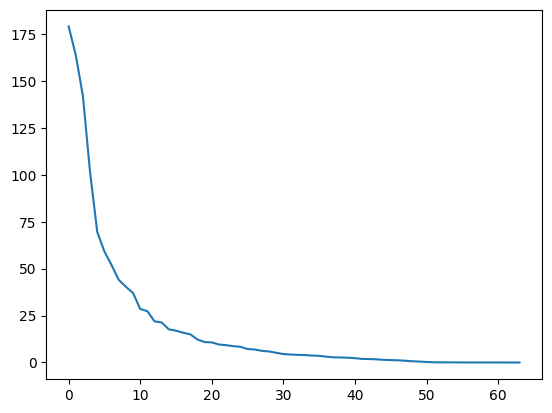

In [ ]:
# substract mean
X1 = X-X.mean(axis=0)

# Calcular la matriz de covarianza manualmente
X1_Cov = np.dot(X1.T, X1) / (X1.shape[0] - 1)

# For Python, se lee X1=U*diag(s)*V

# Calcular la SVD de la matriz de covarianza
U, s, Vt = np.linalg.svd(X1_Cov)

V = Vt.T

print(V.shape)

eigenvalues, eigenvectors = np.linalg.eig(X1_Cov)

# Construir la matriz diagonal de valores singulares
Sigma = np.diag(s)

# Calcular la matriz transformada Xr
Xr = U*Sigma*Vt

plt.plot(S);

In [ ]:
# Conseguir los index de los eigenvalues y eigenvectors ordenados por relevancia
indexes = np.argsort(eigenvalues)[::-1]

eigenvalues_sorted = eigenvalues[indexes]
eigenvectors_sorted = eigenvectors[:,indexes] # sort the columns

In [ ]:
pc = 2 # select the number of principal components
Xr = np.matmul(X1, eigenvectors_sorted[:,:pc]) # transform the original data
print(Xr.shape)

(1797, 2)


Display in 2D.

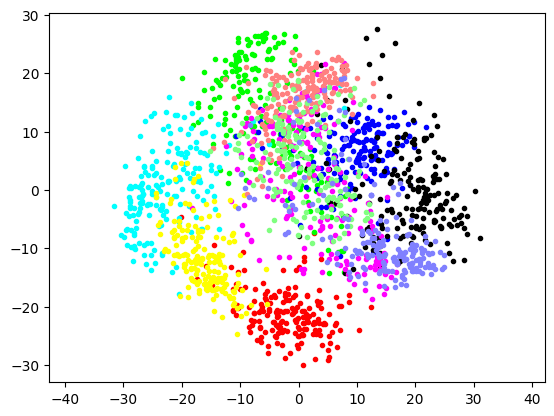

In [ ]:
col = np.array( [ [1,0,0], [0,1,0], [0,0,1], [0,0,0], [0,1,1], [1,0,1], [1,1,0], [1,.5,.5], [.5,1,.5], [.5,.5,1]  ] ).transpose()
for i in np.arange(0,k):
    I = find(y==CL[i])
    plt.plot(Xr[I,0], Xr[I,1], '.', color=col[:,i])
plt.axis('equal');

Veamoslos en 3D.

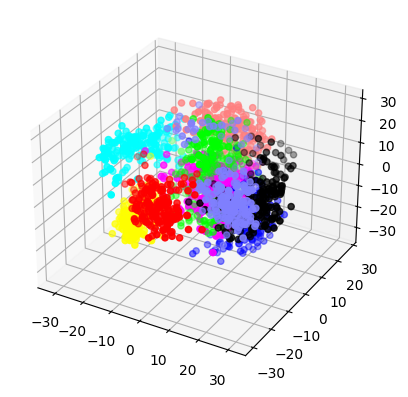

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pc = 3 # select the number of principal components
Xr = np.matmul(X1, eigenvectors_sorted[:,:pc]) # transform the original data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.clf

for i in np.arange(0,k):
    I = find(y==CL[i])
    ax.scatter(Xr[I,0], Xr[I,1], Xr[I,2], '.', color=col[:,i])
plt.axis('tight');

Obtengamos la matriz $D$

In [ ]:
D = np.double( np.tile( CL, (n,1) ) == np.tile( y, (k,1) ).transpose() )

Producto interno entre dos vectores

In [ ]:
def dotp(x,y): return x.flatten().dot( y.flatten().transpose() )

Definamos la energia $E(W)$.

In [ ]:
def E(W): return 1/n*( LSE(X.dot(W)).sum() - dotp(X.dot(W),D)  )

Y su gradiente
  $$ \nabla E(W) =  \frac{1}{n} X^\top ( \text{SM}(X W) - D ).  $$

In [ ]:
def nablaE(W): return 1/n * X.transpose().dot( SM(X.dot(W)) -  D  )

__Exercise 7__

Implemente un gradiente descendente
$$ W_{\ell+1} = W_\ell - \tau_\ell \nabla E(W_\ell). $$
Monitoree el decaimietno de la energia

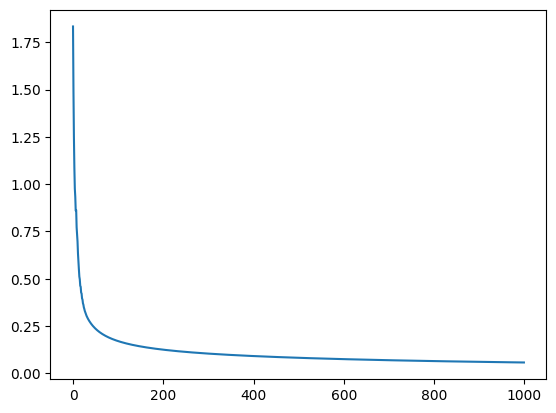

In [ ]:
## Inserta tu codigo
w = np.zeros((X.shape[1],k))

tau = 0.01
iter = 1000
energia = np.zeros(iter)

for i in range(iter):
  grad = nablaE(w)

  w = w - tau * grad

  energia[i] = E(w)

plt.plot(energia)
plt.show()

Generemos una cuadrícula 2D de puntos sobre el espacio PCA y mapearla al espacio de características.

In [ ]:
M = np.abs(Xr.flatten()).max()
q = 201
t = np.linspace(-M,M,num=q)
[B,A] = np.meshgrid(t,t)
G0 = np.vstack([A.flatten(), B.flatten()]).transpose()
Xmean = np.tile( X.mean(axis=0,keepdims=1), (q**2,1) )
G = G0.dot(V[0:2,:]) + Xmean

Evalúe la probabilidad de clase asociada a los vectores de peso en esta cuadrícula.

In [ ]:
Theta = SM(G.dot(w))
Theta = np.reshape(Theta, (q, q, k) )

ValueError: shapes (40401,20) and (64,10) not aligned: 20 (dim 1) != 64 (dim 0)

Veamos cada mapa de probabilidades.

In [ ]:
plt.clf
for i in np.arange(0,k):
    plt.subplot(3,4,i+1)
    plt.imshow(Theta[:,:,i].transpose());
    plt.title('Class ' + str(i+1));
    plt.axis('off')

Construye una imagen en un solo color de este mapa.

In [ ]:
R = np.zeros((q,q,3))
for i in np.arange(0,k):
    for a in np.arange(0,3):
        R[:,:,a] = R[:,:,a] + Theta[:,:,i] * col[a,i]

Veamoslo

In [ ]:
plt.clf
plt.imshow(R.transpose((1, 0, 2)), origin="lower", extent=[-M,M,-M,M])
for i in np.arange(0,k):
    I = find(y==CL[i])
    plt.plot(Xr[I,0], Xr[I,1], '.', color=col[:,i])
plt.axis('off');

__Exercise 8__

Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de pruebas. Evalúe el rendimiento de la clasificación
y muestre la matriz de confusión. Puede probar el impacto de la kernlización y la regularización.

In [ ]:
## Inserta tu codigo

In [ ]:
## Inserta tu codigo

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Especifica la ruta del archivo de texto
archivo_txt = 'fourclass.txt'

# Lee el archivo de texto y carga los datos en un DataFrame
dataframe = pd.read_table(archivo_txt, sep='\s+|:', engine='python', header=None)

# Elimina la segunda y la cuarta columna del DataFrame
dataframe = dataframe.drop([1, 3], axis=1)
y = dataframe.iloc[:, 0].values.reshape(-1, 1)
X = dataframe.iloc[:, 1:].values

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%) con las mismas proporciones de etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Imprime el tamaño de los conjuntos para verificar
# print(f"Tamaño del conjunto de entrenamiento: X_train={X_train.shape}, y_train={y_train.shape}")
# print(f"Tamaño del conjunto de prueba: X_test={X_test.shape}, y_test={y_test.shape}")

# # Verifica que se mantienen las proporciones de las etiquetas
# print("Proporciones de etiquetas en el conjunto de entrenamiento:")
# print(np.unique(y_train, return_counts=True))
# print("Proporciones de etiquetas en el conjunto de prueba:")
# print(np.unique(y_test, return_counts=True))



# Compute the mean and standard deviation of each column
mean = np.mean(X_train, axis=0)
std_dev = np.std(X_train, axis=0)

# Apply Z-score normalization to each column
X_train_normalizado = (X_train - mean) / std_dev

In [ ]:
n = y_train.shape[0] # numero de muestras
p = 2 # Dimension

omega = 3

#X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
# Separa la primera columna en un array y, y las otras dos columnas en un array X
y_train = dataframe.iloc[:, 0].values.reshape(-1, 1)
X_train_normalizado = dataframe.iloc[:, 1:].values
mean = np.mean(X_train_normalizado, axis=0)
std_dev = np.std(X_train_normalizado, axis=0)

# Apply Z-score normalization to each column
X = (X - mean) / std_dev
I = find(y_train==-1)
J = find(y_train==1)

X_train_normalizado[I,0] += 1*omega
X_train_normalizado[I,1] += 0.5*omega

w = np.zeros((p+1,1))
tau = 1; 
w = w - tau * nablaE(w,AddBias(X_train_normalizado),y_train)

for i in range(2500):
  w = w - tau * nablaE(w,AddBias(X_train_normalizado),y_train)

g = 201
tx = np.linspace( X_train_normalizado[:,0].min(), X_train_normalizado[:,0].max(),num=g)
ty = np.linspace( X_train_normalizado[:,1].min(), X_train_normalizado[:,1].max(),num=g)
[B,A] = np.meshgrid(ty,tx)

G = np.vstack([A.flatten(), B.flatten()]).transpose()
Theta = theta(AddBias(G).dot(w))
Theta = Theta.reshape((g,g))


plt.clf
plt.imshow(Theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
plt.axis('equal')
plt.plot(X_train_normalizado[I,0], X_train_normalizado[I,1], '.')
plt.plot(X_train_normalizado[J,0], X_train_normalizado[J,1], '.')
plt.axis('off')